In [1]:
# main module: dida_roofseg (lies in src/dida_roofseg)
# (assuming this notebook is at root .)
import sys
sys.path.append('./src') # ensures src/ is in the path

# standard imports
import os
from pathlib import Path

# third-party imports
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset

from dida_roofseg.io import read_image, read_mask

Image tensor shape: torch.Size([3, 100, 100]), original size: (256, 256)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.5005665].


(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

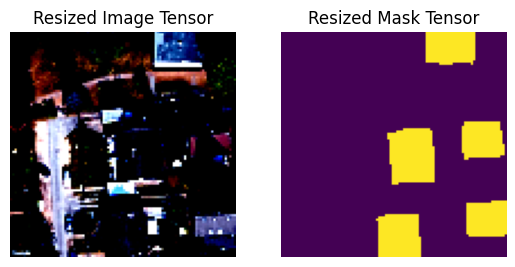

In [3]:
# Try to load an image and a mask
img_path = Path('data/raw/images/121.png')
mask_path = Path('data/raw/masks/121.png')
img_tensor, orig_size = read_image(img_path, image_size=100)
print(f"Image tensor shape: {img_tensor.shape}, original size: {orig_size}")

# Plot the image and mask
import matplotlib.pyplot as plt

# Plot Resized Image
plt.subplot(1, 2, 1)
plt.imshow(img_tensor.permute(1, 2, 0).numpy())
plt.title("Resized Image Tensor")
plt.axis('off')

# Plot Mask
mask_tensor = read_mask(mask_path, image_size=100)
plt.subplot(1, 2, 2)
plt.imshow(mask_tensor.permute(1, 2, 0).numpy())
plt.title("Resized Mask Tensor")
plt.axis('off')



In [4]:
# Lists all the files in data/raw/images
from dida_roofseg.io import discover_pairs
img_paths, mask_dict, test_img_paths = discover_pairs('data/raw')
print(f"Found {len(img_paths)} images, {len(mask_dict)} masks, {len(test_img_paths)} test images.")
print("First 5 image paths:", img_paths[:5])
print("First 5 mask paths:", list(mask_dict.items())[:5])

Found 25 images, 25 masks, 5 test images.
First 5 image paths: [PosixPath('data/raw/images/121.png'), PosixPath('data/raw/images/241.png'), PosixPath('data/raw/images/270.png'), PosixPath('data/raw/images/272.png'), PosixPath('data/raw/images/274.png')]
First 5 mask paths: [('121', PosixPath('data/raw/masks/121.png')), ('241', PosixPath('data/raw/masks/241.png')), ('270', PosixPath('data/raw/masks/270.png')), ('272', PosixPath('data/raw/masks/272.png')), ('274', PosixPath('data/raw/masks/274.png'))]


In [8]:
# Try to use the RoofDataset class
from dida_roofseg.dataset import RoofDataset
dataset = RoofDataset(mode='train', image_paths=img_paths, mask_dir_map=mask_dict, image_size=100)
print(f"Dataset length: {len(dataset)}")
img_tensor, mask_tensor = dataset[0]
print(f"First image tensor shape: {img_tensor.shape}, first mask tensor shape: {mask_tensor.shape}")

Dataset length: 25
First image tensor shape: torch.Size([3, 100, 100]), first mask tensor shape: torch.Size([1, 100, 100])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.5005665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0474076].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0125492].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..1.6639653].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9980307..2.2042704].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..

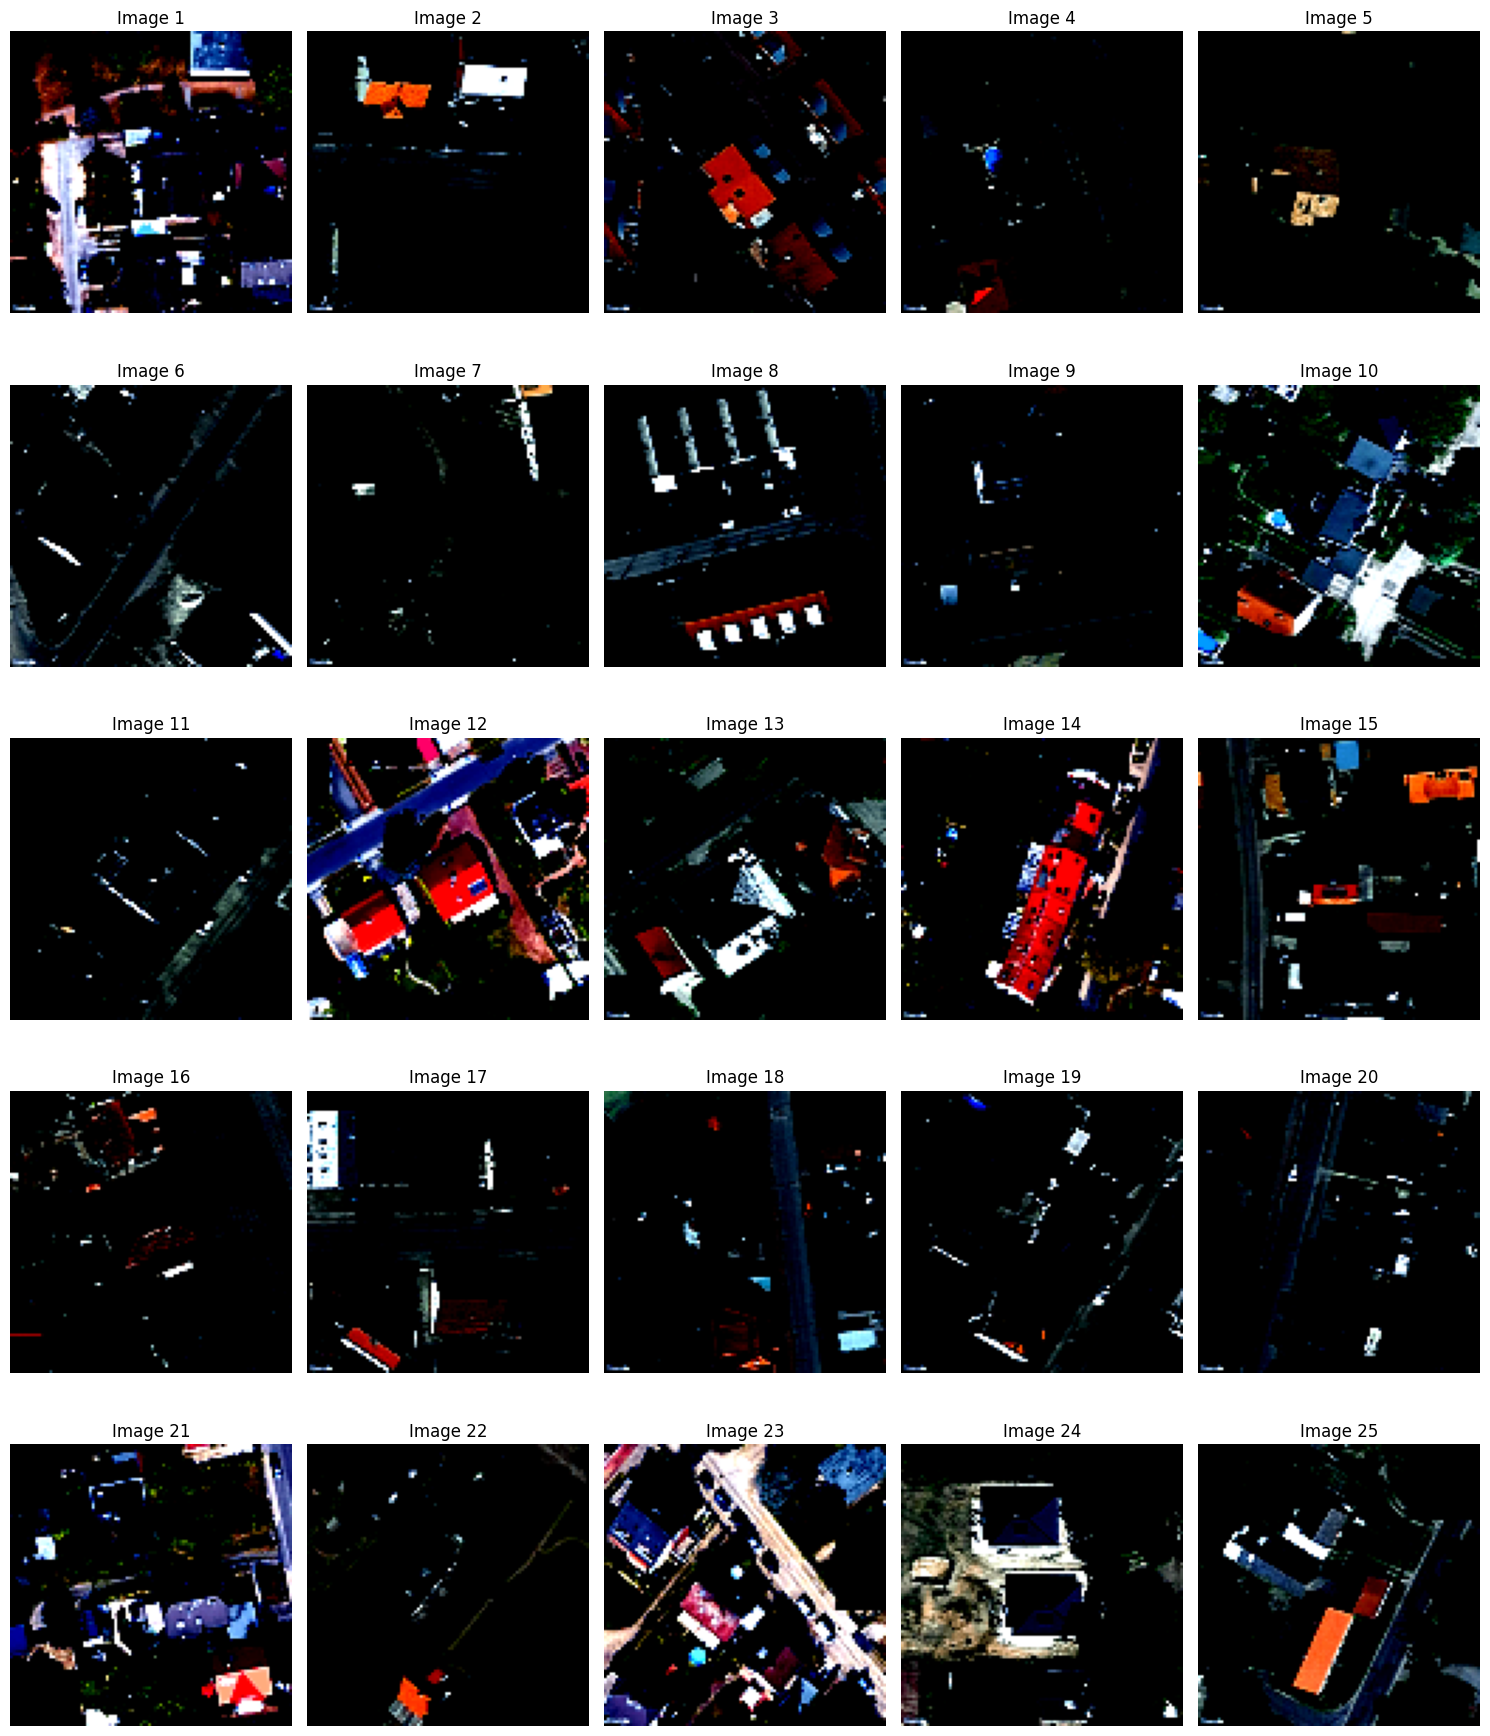

In [19]:
# print all 25 images in the dataset
dataset.mode = 'val'  # switch to eval mode to avoid mask requirement

fig, axes = plt.subplots(5, 5, figsize=(15, 18))
for i in range(len(dataset)):
    img_tensor, mask_tensor = dataset[i]
    ax = axes[i // 5, i % 5]
    ax.imshow(img_tensor.permute(1, 2, 0).numpy())
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [18]:
dataset.__len__()

25

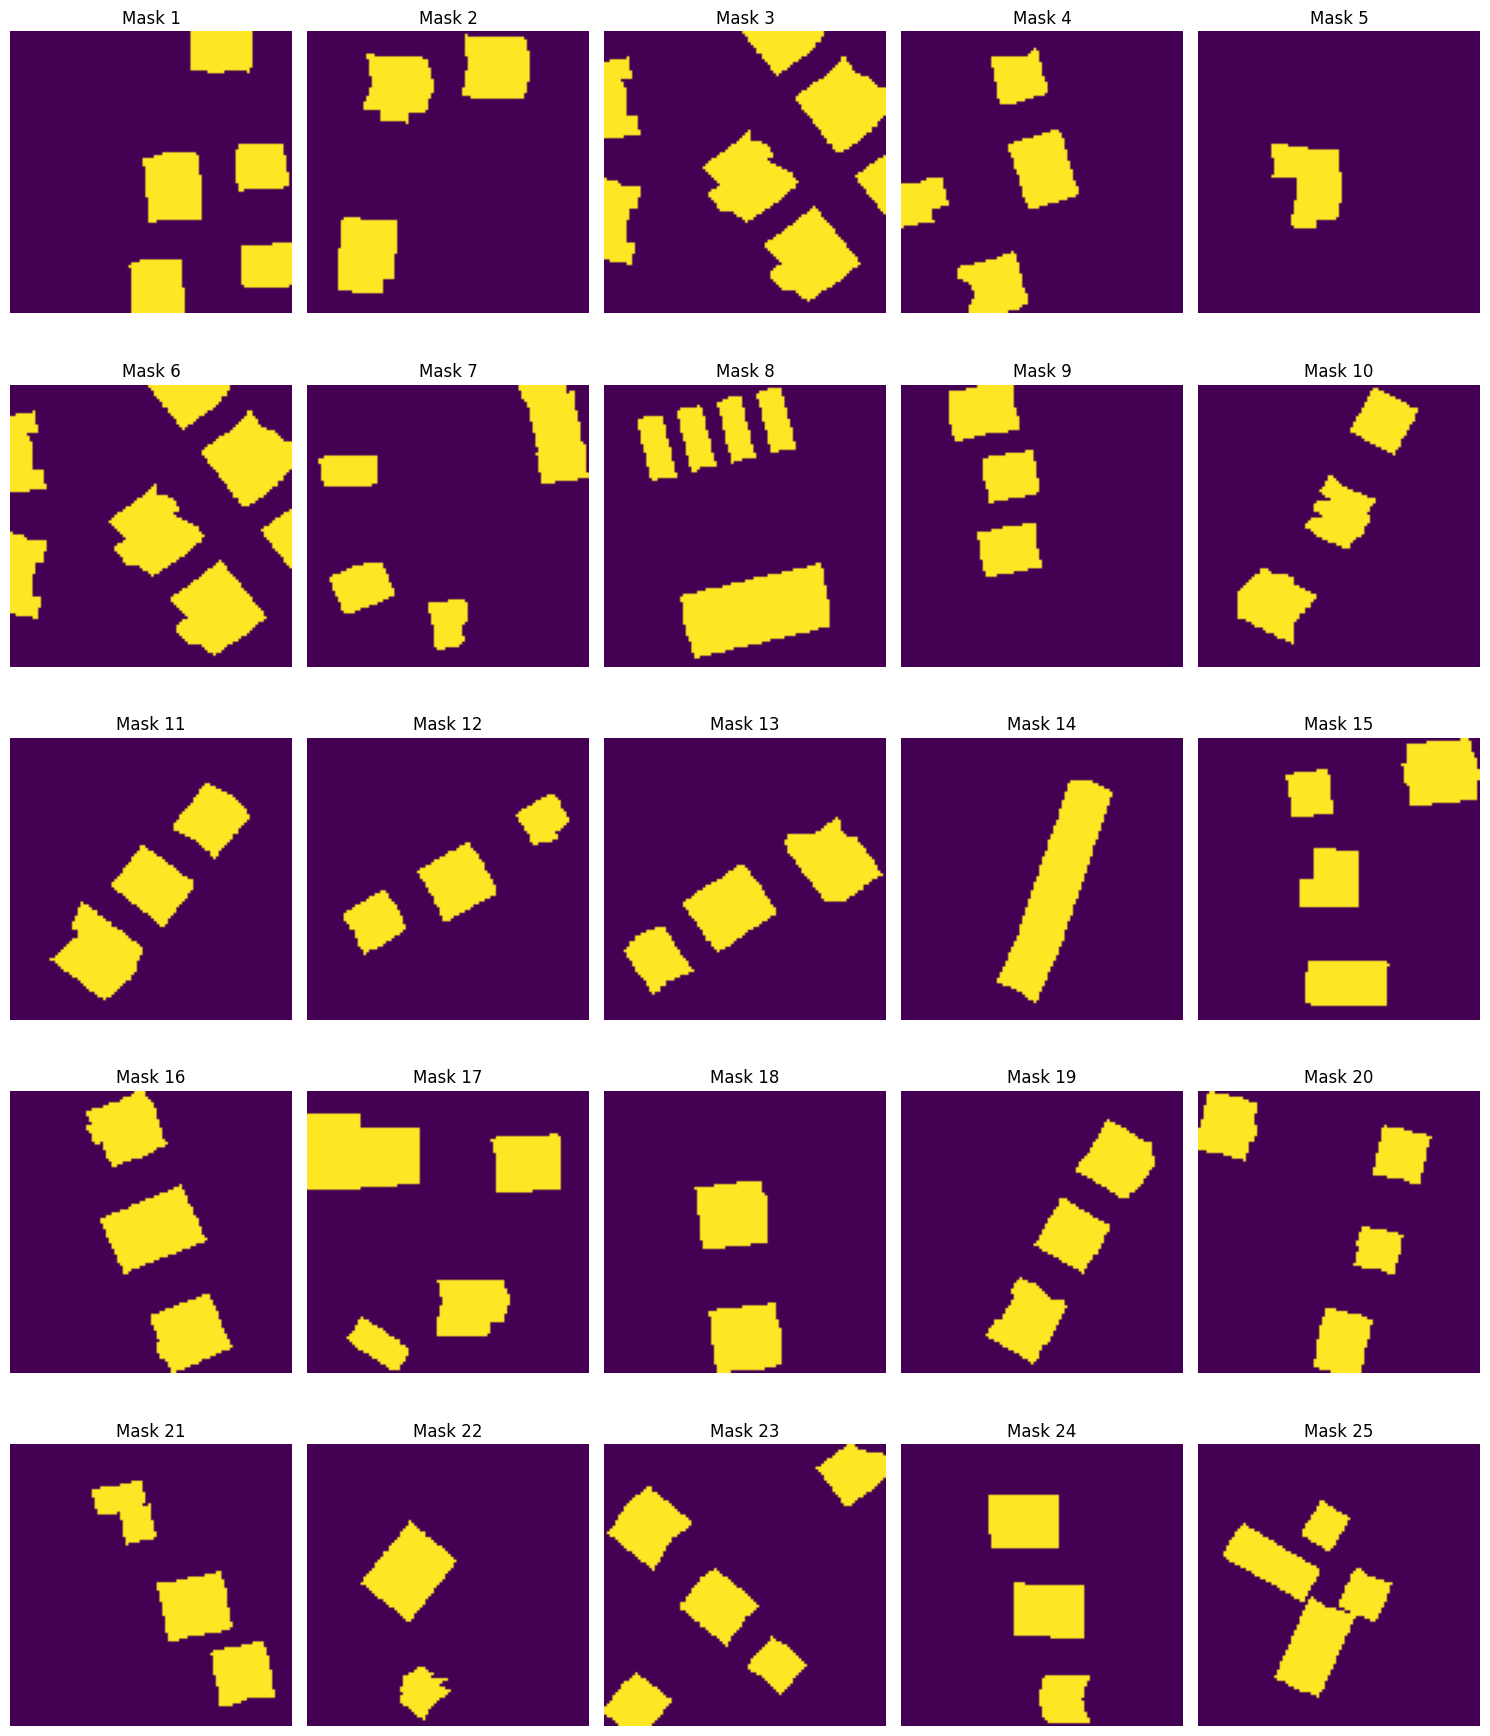

In [20]:
# print all 25 masks in the dataset
fig, axes = plt.subplots(5, 5, figsize=(15, 18))
for i in range(len(dataset)):
    img_tensor, mask_tensor = dataset[i]
    ax = axes[i // 5, i % 5]
    ax.imshow(mask_tensor.permute(1, 2, 0).numpy())
    ax.set_title(f"Mask {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()